# Homework 3

## Problem 1: Feature Detection

### Imports

In [1]:
import glob

import seaborn as sns
import matplotlib.pyplot as plt

import util
from util.corner_detection import HarrisCornerDetector

DATA_PATH = "./AlignmentTwoViews/*"

### Part A: Harris Corner Detector

#### Image 1

In [5]:
img_paths = glob.glob(DATA_PATH)

In [3]:
img_paths

['./AlignmentTwoViews/uttower_right.jpg',
 './AlignmentTwoViews/uttower_left.jpg']

In [4]:
img1 = util.load_image(img_paths[0], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 683 x 1024


In [5]:
corner_detector = HarrisCornerDetector()
response = corner_detector.detect_features(img1)

Let's just double check the properties of this `response` variable:

In [6]:
type(response)

numpy.ndarray

In [7]:
response.shape

(683, 1024)

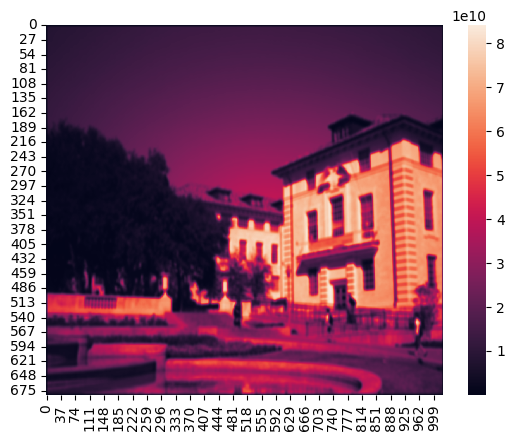

In [8]:
sns.heatmap(response)  # just playing around, this is not my solution image
plt.show()

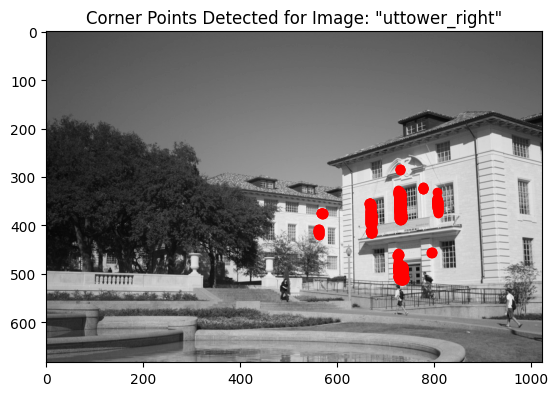

In [12]:
HarrisCornerDetector.execute_and_visualize(
    img1, "uttower_right",
    use_non_max_suppression=False,
)

#### Image 2

In [5]:
img2 = util.load_image(img_paths[1], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_left.jpg: 683 x 1024


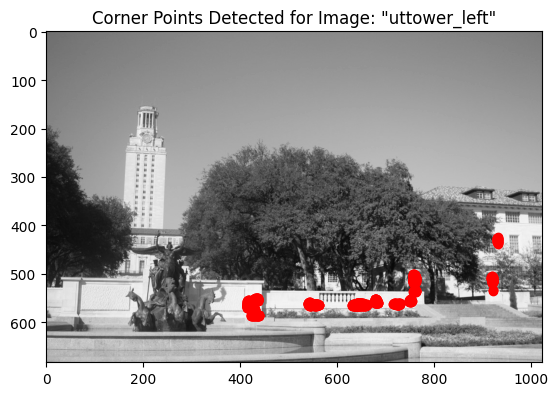

In [17]:
HarrisCornerDetector.execute_and_visualize(
    img2,
    "uttower_left",
    use_non_max_suppression=False,
)

### Part B: Leveraging Non-Maximum Suppression

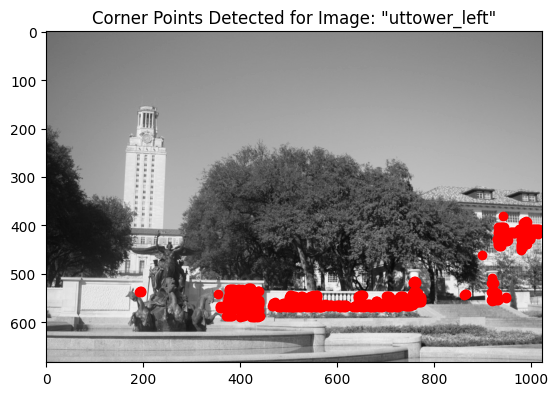

In [6]:
HarrisCornerDetector.execute_and_visualize(
    img2,
    "uttower_left",
    use_non_max_suppression=True,
)

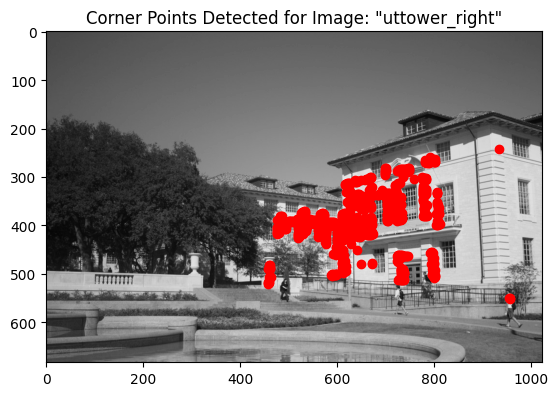

In [9]:
HarrisCornerDetector.execute_and_visualize(
    img1,
    "uttower_right",
    use_non_max_suppression=True,
)

### Part C: Patch Similarity Measures

In [2]:
from util.ops import SimilarityMeasure

For convenience, let's recompute the features for both images (in case the cells above haven't been run):

In [3]:
corner_detector = HarrisCornerDetector()

In [4]:
img_paths = glob.glob(DATA_PATH)
right_img = util.load_image(img_paths[0], return_array=True)
left_img = util.load_image(img_paths[1], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 683 x 1024
Dimensions of ./AlignmentTwoViews/uttower_left.jpg: 683 x 1024


In [12]:
response_imgs = {
    "uttower_left": corner_detector.detect_features(
        left_img, use_non_max_suppression=True
    ),
    "uttower_right": corner_detector.detect_features(
        right_img, use_non_max_suppression=True
    ),
}

#### Similarity Measure 1: SSD

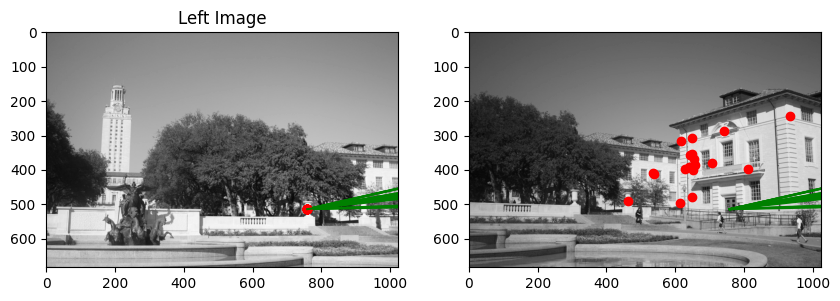

In [5]:
HarrisCornerDetector.visualize_patch_similarity(
    left_img,
    right_img,
    plot_title='',
    use_non_max_suppression=True,
    similarity_metric=SimilarityMeasure.SSD,
)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Right Image')

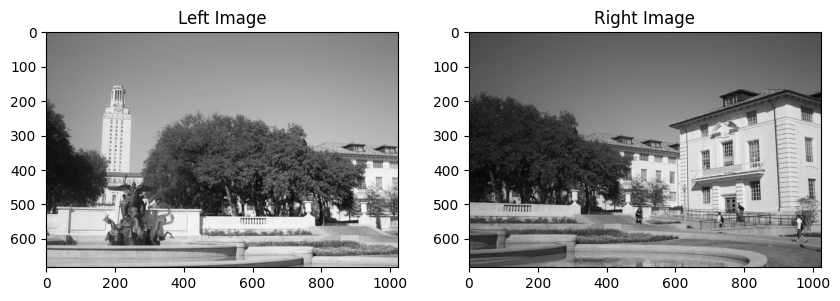

In [9]:
 _, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image
ax[0].invert_yaxis()
ax[0].imshow(left_img, cmap="gray")
ax[0].set_title("Left Image")

# Plot the second image
ax[1].imshow(right_img, cmap="gray")
ax[1].set_title("Right Image")

#### Similarity Measure 2: NCC

#### Discussion: SSD vs. NCC?